In [7]:
'''pip install xgboost
!pip install shap'''

'pip install xgboost\n!pip install shap'

In [8]:
import pandas as pd 
import shap
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier

In [9]:
#Reading the dataset 
df=pd.read_csv("C:/Users/amani/OneDrive/Desktop/Intern_IITM/Project/Files/Final_Dataset.csv")
df.head()

,Unnamed: 0,1007_s_at,1053_at,121_at,1294_at,1316_at,1405_i_at,1487_at,1494_f_at,1598_g_at,...,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,Age,Cancer,Normal,Positive
0,GSM246422,9.407554,5.565053,8.726430,8.019899,5.105877,5.703825,7.342717,6.525351,11.709236,...,9.295287,9.261067,11.481549,11.463537,13.074366,12.981368,46.0625,0,1,0
1,GSM246423,9.630196,5.672118,8.757641,8.216776,5.363880,5.345908,7.374830,6.380742,11.163090,...,8.382889,8.226192,11.035883,10.842324,12.913571,12.648306,46.0625,0,1,0
2,GSM246484,9.764252,5.427428,8.981097,8.129541,5.482619,5.497766,7.371828,6.775736,11.129177,...,8.059408,7.937681,10.825097,10.488385,12.459533,12.287843,46.0625,0,1,0
3,GSM246485,11.409979,6.367622,8.380824,8.604724,5.579678,6.158459,8.094469,6.730903,9.879993,...,9.351937,9.443774,11.706976,11.448037,13.059036,12.950919,27.0000,0,1,0
4,GSM246486,10.004760,6.159440,8.793381,7.821388,5.576516,6.740634,7.425016,6.966267,10.440405,...,9.427238,9.672939,11.488805,11.321471,13.004769,13.175343,38.0000,0,1,0


In [10]:
#standardization of the dataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#separating dependent(y) and independent features(x)
X=df.drop(["Cancer","Unnamed: 0","Normal","Positive","Age"],axis=1)
y=df["Cancer"]

# train-test-split 80-20 split after split 68-> train and 17->test
#total genes 9528

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2,stratify=y)
print(f"Shape of X_train and y_train: {X_train.shape},{y_train.shape}")
print(f"Shape of X_test and y_test: {X_test.shape},{y_test.shape}")

Shape of X_train and y_train: (68, 9528),(68,)
Shape of X_test and y_test: (17, 9528),(17,)


In [11]:
#stanndardization
std=StandardScaler()
X_train_scaled=std.fit_transform(X_train) 
X_test_scaled=std.transform(X_test) # using transform method to prevent the data leakage 

In [12]:
#training the model

# 1. Random Forest Model

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train_scaled, y_train)

rf_imp = rf.feature_importances_
rf_df = pd.DataFrame({'ID': X_train.columns, 'Importance': rf_imp}).sort_values(by='Importance', ascending=False)


In [13]:
rf_df[:25]

,ID,Importance
1704,202580_x_at,0.038476
650,201202_at,0.026300
3416,206102_at,0.025732
2770,204284_at,0.025496
2236,203358_s_at,0.022624
8928,221677_s_at,0.019264
8237,219105_x_at,0.018812
7770,218355_at,0.018237
7934,218585_s_at,0.018080
3712,207828_s_at,0.017860


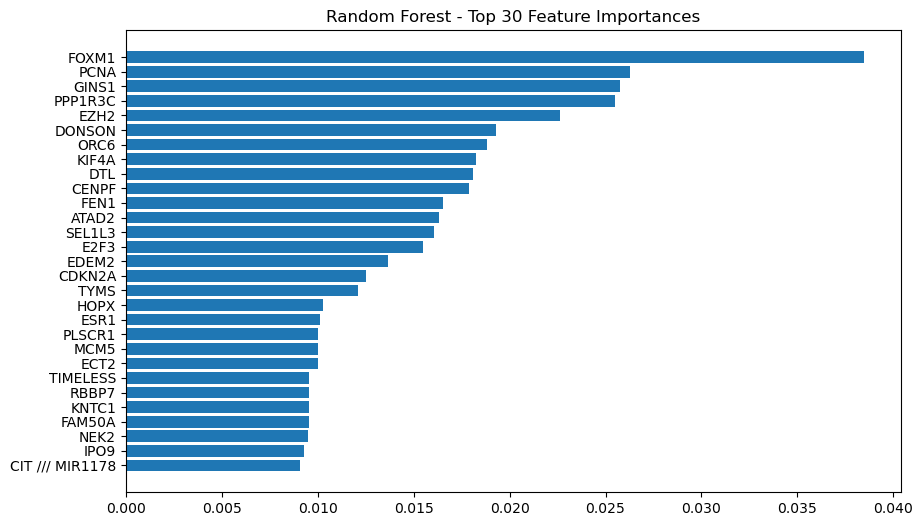

In [51]:
#plotting importances
plt.figure(figsize=(10, 6))
plt.barh(final_importance_rf['Gene Symbol'].head(30), rf_df['Importance'].head(30))
plt.title("Random Forest - Top 30 Feature Importances")
plt.gca().invert_yaxis()
plt.show()

In [15]:

# 2. Lasso Logistic Regression based
import numpy as np

lasso = LogisticRegression(penalty='l1', solver='liblinear', class_weight='balanced', max_iter=1000)
lasso.fit(X_train_scaled, y_train)

lasso_imp = np.abs(lasso.coef_[0])
lasso_df = pd.DataFrame({'ID': X_train.columns, 'Importance': lasso_imp}).sort_values(by='Importance', ascending=False)


In [16]:
lasso_df[:100]

,ID,Importance
3558,207039_at,0.458014
2770,204284_at,0.417177
3630,207480_s_at,0.229080
1352,202107_s_at,0.214092
8928,221677_s_at,0.212607
...,...,...
6384,213705_at,0.000000
6383,213704_at,0.000000
6279,213496_at,0.000000
6381,213702_x_at,0.000000


In [30]:
#plotting the importances

#Normal: represents the no HPV and no cancer
#Positive: HPV is there and Cancer is there

plt.figure(figsize=(10, 6))
plt.barh(final_importance_lasso['Gene Symbol'].head(30), lasso_df['Importance'].head(30))
plt.title("LASSO - Top 30 Feature Coefficients")
plt.gca().invert_yaxis()
plt.show()

NameError: name 'final_importance_lasso' is not defined

<Figure size 1000x600 with 0 Axes>

In [17]:
# 3. XGboost based implementation
pos_weight = (y_train == 0).sum() / (y_train == 1).sum() #represents the class imbalanceness
xgb_model = xgb.XGBClassifier(scale_pos_weight=pos_weight, random_state=42)
xgb_model.fit(X_train_scaled, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

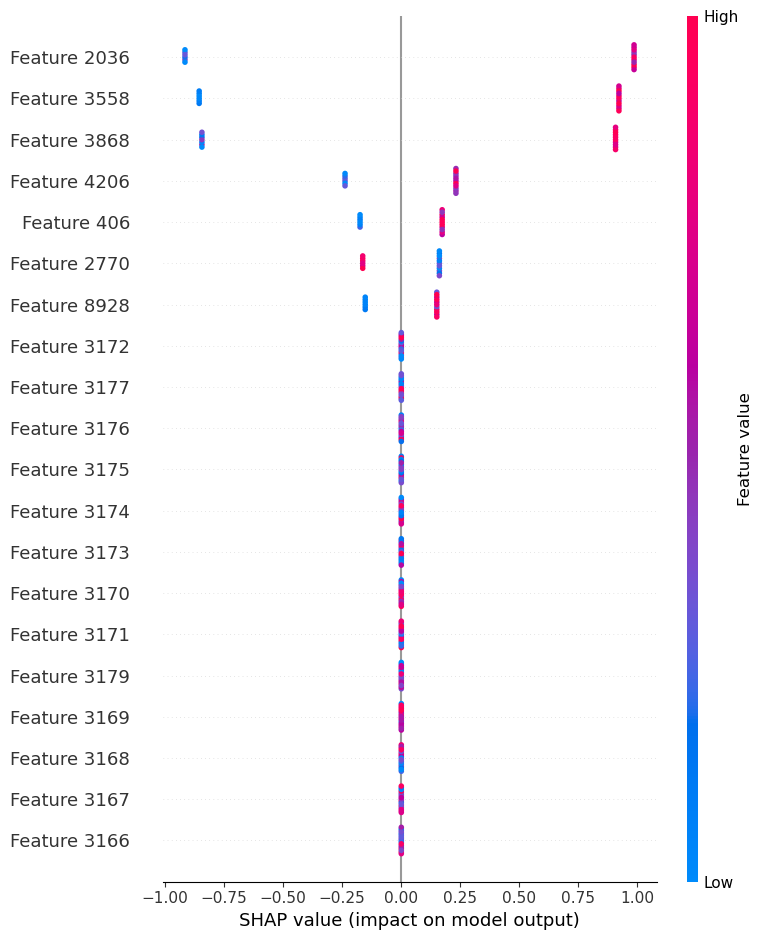

In [19]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test_scaled)
shap.summary_plot(shap_values, X_test_scaled)

In [20]:
if isinstance(shap_values, list):
    shap_array = shap_values[1]  # or shap_values[0], depending on your use case
else:
    shap_array = shap_values

# Convert to DataFrame
shap_df = pd.DataFrame(shap_array, columns=X.columns)
feature_df = pd.DataFrame(X, columns=X.columns)

# Find features with highest SHAP value deviation
shap_std = shap_df.std().sort_values(ascending=False)
top_features = shap_std[shap_std > 0]

# Top N features
top_n = 15
top_feature_names = top_features.head(top_n).index.tolist()

# Display
print("Top deviating SHAP features:")
print(shap_df[top_feature_names].head())


Top deviating SHAP features:
   203046_s_at  208644_at  207039_at  209054_s_at  200913_at  204284_at  \
0     0.985818  -0.844587   0.921769     0.231436   0.173136   0.161251   
1     0.985818   0.907482   0.921769     0.231436   0.173136   0.161251   
2    -0.916350  -0.844587  -0.856160     0.231436  -0.174781  -0.163451   
3     0.985818   0.907482   0.921769     0.231436   0.173136   0.161251   
4    -0.916350  -0.844587  -0.856160    -0.238354  -0.174781  -0.163451   

   221677_s_at  
0     0.150276  
1     0.150276  
2    -0.152789  
3     0.150276  
4    -0.152789  


In [21]:
#accuracy testing with f1 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    print(f"\n==== {name} Performance ====")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    if y_proba is not None:
        print("ROC-AUC  :", roc_auc_score(y_test, y_proba))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# === Run for all models ===
evaluate_model("Random Forest", rf, X_test_scaled, y_test)
evaluate_model("LASSO Logistic Regression", lasso, X_test_scaled, y_test)
evaluate_model("XGBoost", xgb_model, X_test_scaled, y_test)


==== Random Forest Performance ====
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0
ROC-AUC  : 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        11

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17

Confusion Matrix:
[[ 6  0]
 [ 0 11]]

==== LASSO Logistic Regression Performance ====
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0
ROC-AUC  : 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        11

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17

Confusion Matrix:
[[ 6  0

c:\Users\amani\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


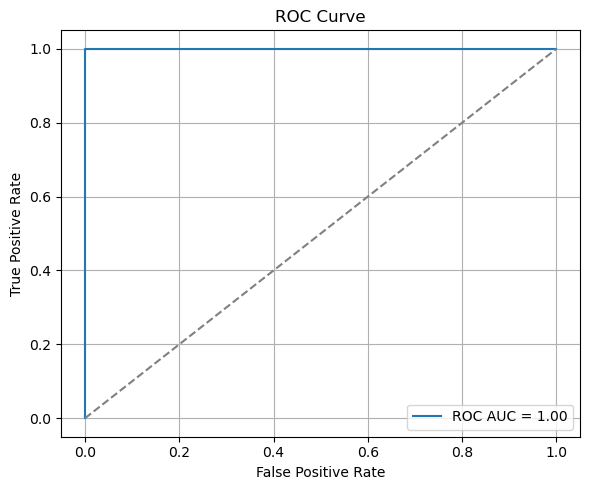

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
y_scores = lasso.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

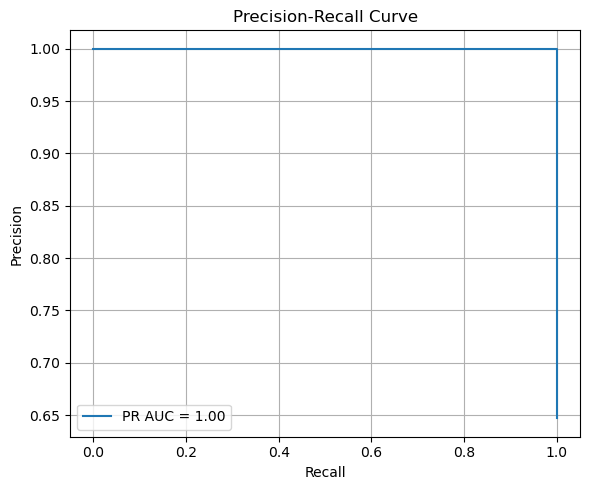

In [23]:
precision, recall, _ = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf, X, y, cv=cv, scoring='f1')
print("F1 CV mean:", scores.mean())

F1 CV mean: 0.9722567287784679


In [25]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(lasso, X, y, cv=cv, scoring='f1')
print("F1 CV mean:", scores.mean())

F1 CV mean: 0.9777777777777779


In [26]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(xgb_model, X, y, cv=cv, scoring='f1')
print("F1 CV mean:", scores.mean())

F1 CV mean: 0.9619047619047618


In [27]:
from sklearn.metrics import f1_score, accuracy_score

# Fitting model on training data
rf.fit(X_train_scaled, y_train)

# Predicting on training data
y_train_pred = rf.predict(X_train_scaled)

# Calculating training accuracy
train_acc = accuracy_score(y_train, y_train_pred)

# Calculating training F1 score (macro, micro, or weighted depending on your problem)
train_f1 = f1_score(y_train, y_train_pred, average='micro')  # or 'micro' or 'weighted'

print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Training F1 Score: {train_f1 * 100:.2f}%")

Training Accuracy: 100.00%
Training F1 Score: 100.00%


In [28]:
import pandas as pd 


In [31]:
df_gene1=pd.read_csv("C:/Users/amani/OneDrive/Desktop/Intern_IITM/Project/Files/GSE6791/GSE6791_filteredExpression.csv")
df_gene1=df_gene1[["ID","Gene Symbol"]]
df_gene1.head()


,ID,Gene Symbol
0,1007_s_at,DDR1 /// MIR4640
1,1053_at,RFC2
2,121_at,PAX8
3,1294_at,MIR5193 /// UBA7
4,1316_at,THRA


In [35]:
df_gene2=pd.read_csv("C:/Users/amani/OneDrive/Desktop/Intern_IITM/Project/Files/GSE9750/GSE9750_filteredExpression.csv")
df_gene2=df_gene2[['ID','Gene Symbol.x']]

In [36]:
l1=list(df_gene2.columns)
l1


['ID', 'Gene Symbol.x']

In [37]:
l1[1]="Gene Symbol"

In [38]:
df_gene2.columns=l1

In [39]:
df_gene2.head()

,ID,Gene Symbol
0,1007_s_at,DDR1 /// MIR4640
1,1053_at,RFC2
2,121_at,PAX8
3,1294_at,MIR5193 /// UBA7
4,1316_at,THRA


In [40]:
merged_df = pd.concat([df_gene1, df_gene2]).drop_duplicates()
merged_df=merged_df.set_index("ID")

In [41]:
lasso_df_1=lasso_df.set_index("ID")

In [42]:
final_importance_lasso=pd.merge(lasso_df_1,merged_df,left_index=True,right_index=True)

In [43]:
final_importance_lasso[:100]

,Importance,Gene Symbol
ID,,
207039_at,0.458014,CDKN2A
204284_at,0.417177,PPP1R3C
207480_s_at,0.229080,MEIS2
202107_s_at,0.214092,MCM2
221677_s_at,0.212607,DONSON
...,...,...
213705_at,0.000000,GGCX
213704_at,0.000000,RABGGTB /// SNORD45A /// SNORD45B /// SNORD45C
213496_at,0.000000,LPPR4


In [44]:
rf_df_1=rf_df.set_index("ID")

In [45]:
final_importance_rf=pd.merge(rf_df_1,merged_df,left_index=True,right_index=True)
final_importance_rf[:100]

,Importance,Gene Symbol
ID,,
202580_x_at,0.038476,FOXM1
201202_at,0.026300,PCNA
206102_at,0.025732,GINS1
204284_at,0.025496,PPP1R3C
203358_s_at,0.022624,EZH2
...,...,...
219764_at,0.002123,FZD10
200980_s_at,0.002113,PDHA1
212082_s_at,0.002081,MYL6


In [46]:
top_feature_names = pd.DataFrame(shap_array, columns=X.columns).std().sort_values(ascending=False).head(10)
print(top_feature_names)

203046_s_at    0.936993
208644_at      0.888824
207039_at      0.875794
209054_s_at    0.231415
200913_at      0.171381
204284_at      0.159946
221677_s_at    0.149287
1007_s_at      0.000000
213642_at      0.000000
213644_at      0.000000
dtype: float32


In [47]:
shap_df = shap_std.head(10).reset_index()
shap_df.columns = ['Feature', 'SHAP_StdDev']
shap_df=shap_df.set_index("Feature")

In [48]:
shap_df_main=pd.merge(shap_df,merged_df,left_index=True,right_index=True)

In [49]:
shap_df_main

,SHAP_StdDev,Gene Symbol
203046_s_at,0.936993,TIMELESS
208644_at,0.888824,PARP1
207039_at,0.875794,CDKN2A
209054_s_at,0.231415,WHSC1
200913_at,0.171381,PPM1G
204284_at,0.159946,PPP1R3C
221677_s_at,0.149287,DONSON
1007_s_at,0.000000,DDR1 /// MIR4640
213642_at,0.000000,NaN
213644_at,0.000000,CEP112


In [52]:
merged_df.to_csv("All_GENES_ID.csv")